<a href="https://colab.research.google.com/github/acastellanos-ie/machine_learning_2/blob/master/data_cleaning_practice/practice_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [ ]:
repository_url = 'https://github.com/acastellanos-ie/machine_learning_2'

In [ ]:
! git clone $repository_url

Cloning into 'machine_learning_2'...
fatal: could not read Username for 'https://github.com': No such device or address


Install the requirements

In [ ]:
! pip install -Uqqr machine_learning_2/requirements.txt

Go to the practice directory



In [ ]:
%cd machine_learning_2/data_cleaning_practice

Ensure that you have the GPU runtime activated:

![](https://miro.medium.com/max/3006/1*vOkqNhJNl1204kOhqq59zA.png)

Now you have everything you need to execute the code in Colab

The following cell includes some imports that we will need in the rest of the practice

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv

import warnings
warnings.filterwarnings('ignore')

In the following sections, we will cover some of the most important steps for Data Cleaning. We have covered them in class, but I want to show you how they work in practice and the impact that they can have on your Machine Learning solutions.

This practice is not a guideline that you must follow step by step. I just wanted to compile them all in the same notebook to refer to it when you are implementing your own solutions. Even if you need to adapt them to your datasets and the particular scenario you are trying to solve, you will have the pointers to know where you can start.

Please also consider that this is not an exhaustive list of solutions. Feel free to keep researching if you need more advanced methodologies. In any case, the solutions and examples included in this practice will help you solve most of the ML problems you will face in the future.

**Disclaimer**: Most of this code comes from the two following resources:
- [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html): I recommend you check out the Documentation for more details and examples (not only for this practice but also for the rest of the course).
- [Introduction to Machine Learning with Python (Book)](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/): The book focuses not only on Data Cleaning but also on the entire ML process. I do recommend you to check it out for more examples.

# Scaling

Let's start by talking about scaling. I hope that after the theoretical session, you are aware of the importance of scaling your data.
For example, many machine learning methods  (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In this practice, I will introduce you to the different scalers that sklearn provides and how to use them correctly in practice.

For more details, please refer to: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

Do not be scared with the following piece of code. It only creates a dataset with 2 features that have different scales. Then, it applies 4 different scalers, and it plots the dataset transformed according to each of them. In particular, the following scalers are used:

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardize features by removing the mean and scaling to unit variance independently on each feature by computing the relevant statistics on the samples in the training set. Please, consider that it might behaves badly if the individual features do not more or less look like standard normally distributed data.
- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robustscaler#sklearn.preprocessing.RobustScaler): Scaling method that is robust to outliers.This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The scaline is independent for each feature by computing the relevant statistics on the samples in the training set. 

- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler): Transform features by scaling each feature to a given range (e.g. between zero and one). This estimator scales and translates each feature individually. This Scaler is sometimes used as an alternative to the StandardSclaer. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.
- [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html?highlight=normalizer#sklearn.preprocessing.Normalizer): Normalize samples individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.



In any case, the code itself is not important. I want you to pay attention to the resultant datasets, focusing on the transformations generated by each Scaler. Bear that in mind when you need to apply them in the feature to apply the one that is more suited for your data.



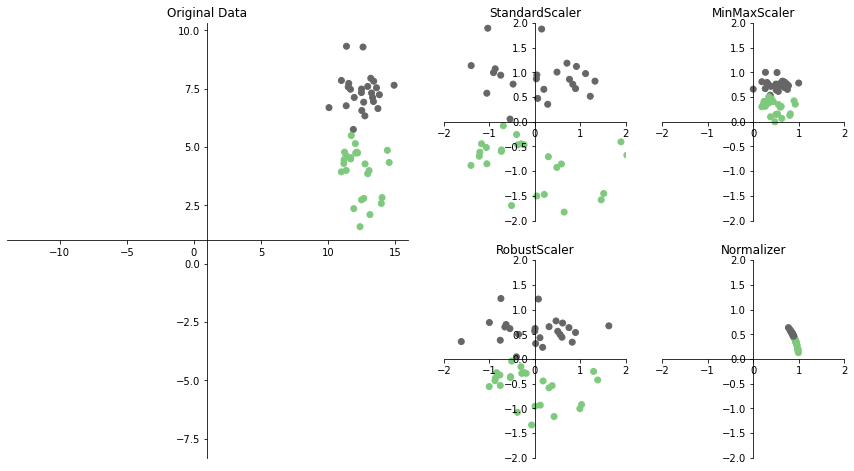

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# Generates the dataset
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
# Scale the dataset
X += 3 

# Create the space to plot the figures
plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

# Plots the orginal data
main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j)) for j in range(2, 4) for i in range(2)]

# Applies the 4 different scalers and plot the transformed dataset
for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

# Format the plots (just to look cleaner and nicer)
for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

There is something important that I would like to highlight related to the application of the Scalers (and any other of the sklearn transformers): Exactly the same transformation must be applied to the training set and the test set for the supervised model to make sense on the test set. 

The following figures illustrate this concept in more detail and what would happen if we did not use it properly.

The next piece of code generates a training (blue points) and test dataset (red triangles). As you can see in the picture, their distribution is not exactly the same. On top of that, the 2 features have different scales. 
Therefore, as we have learned, we need to scale them. 

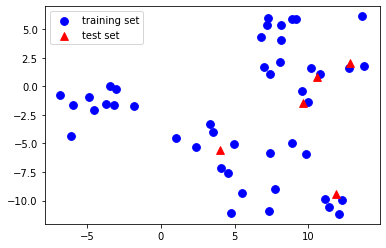

In [ ]:
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5, test_size=.1)

# plot the training and test set
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');


For the scaling, I have decided to apply the MinMaxScaler that we reviewed before.

In order to do that, the correct process is to:
- Fit the scaler to the training data (i.e., learn the transformation based on the statistics of the training data).
- Transform the training data according to the transformation learned in the training set
- Transform the test data by using the SAME transformation.

As you can check in the picture, the data is properly scaled. The features are now in the 0-1 scale while respecting the structure of the data.

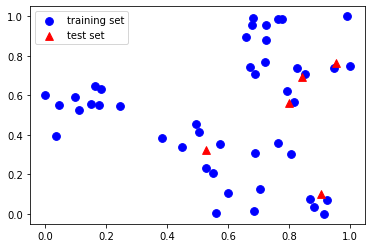

In [ ]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c='r', label="test set", s=60);
plt.legend(loc='upper left');

However, what happens if I am not careful with this transformation. Let's check it out.

As depicted in the following code, a common error is to use a different transformation for the training and the test set. It happens when you fit the Scaler to the training dataset and apply the transformation to the training dataset to then fit the Scaler again to the test dataset.

If you do such a thing, the training dataset's transformation will be different from the transformation to the test dataset. The transformation on the training dataset will be based on the statistics learned in the training dataset, and the transformation on the test dataset will be based on the statistics of the test dataset (which are different from the statistics from the training dataset!).

You can see the error that it produces in the following picture. As you can see, the test set has been scaled according to the test statistics (in this case, the max and min value). Consequently, the structure of the data is entirely different than the original one! 

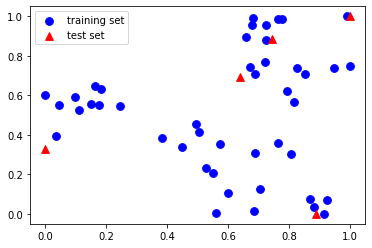

In [ ]:
# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');

Be extremely careful with this error, it is easy to overlook, but it will significantly impact your machine learning solution as you can see in the following code.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_scaled, y_train)  
pipe.score(X_test_scaled, y_test) 

0.8

In [ ]:
pipe.fit(X_train_scaled, y_train)  
pipe.score(X_test_scaled_badly, y_test) 

0.6

## Feature Distribution

With Scaling, we have checked that all the features have the same scale. Some of the scalers also focus on providing a well-behaved distribution of the feature values (i.e., mean equals 0 and std equals 1). I would like to review in more detail this later aspect.

Many ML methods and algorithms work under the assumption that your feature values will be scaled and follow a normal distribution. If that is not the case, they can fail when applied or provide misleading results. A standard procedure to avoid this problem is to check the feature distribution.

The following piece of code imports the well-known house dataset and scales it. This dataset is a clean and simplified version of the actual datasets you will find in the real world, but as it includes different features with different distributions, it will serve to illustrate this point.

In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml("house_sales", as_frame=True)
target = data.frame.price
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)

X, y = df, target

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)


To explore the data distribution, the following code plots the histogram for the values of each feature. As you can see, some of them are skewed to the left or the right. Therefore, we need to apply some kind of skewness correction.

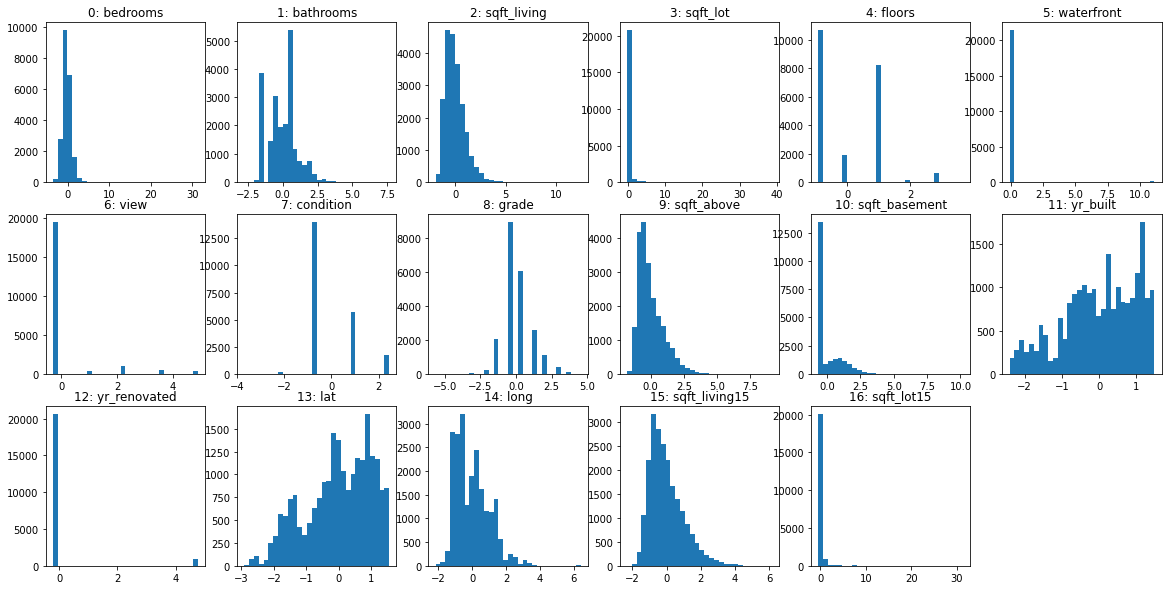

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_scaled[:, i], bins=30)
    ax.set_title("{}: {}".format(i, X.columns[i]))

In particular, I made use of the [PowerTransform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). Power transforms are applied to make data more Gaussian-like. Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform (you have the `method` parameter to set this up).

For more details, please refer to the sklearn documentation.

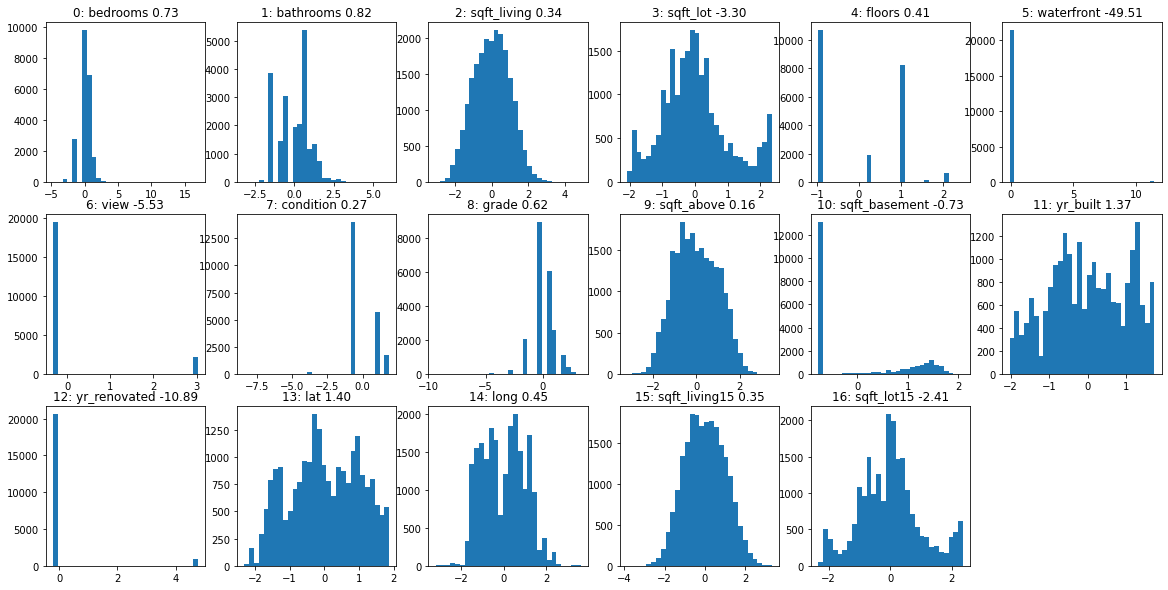

In [ ]:

from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
pt = PowerTransformer()
X_pt = pt.fit_transform(X_scaled)

for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_pt[:, i], bins=30)
    ax.set_title("{}: {} {:.2f}".format(i, X.columns[i], pt.lambdas_[i]))

As you can see in the previous picture, the data looks much more Gaussian now. It is not just a cosmetic transformation. As you can check in the following code, it has a significant impact on the model performance.

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X, y, cv=10)
np.mean(scores), np.std(scores)

(0.6908631122746844, 0.011110651006138771)

In [ ]:
scores = cross_val_score(RidgeCV(), X_scaled, y, cv=10)
np.mean(scores), np.std(scores)

0.6909018921991266 0.01107260334293567


In [ ]:
scores = cross_val_score(RidgeCV(), X_pt, y, cv=10)
np.mean(scores), np.std(scores)

(0.5990509139560886, 0.021738690661655093)

# Categorical Columns

The next thing to consider is the presence of categorical columns. Most ML algorithms come from Statistics. Consequently, they were designed to learn from numerical statistics about the data and not from categorical values. In fact, most of the ML algorithms will fail if you feed them with categorical values.

However, categorical features are the basis for the majority of the business problems you will tackle with ML. Not only that, but they will likely include the most relevant information.

This section will cover some ideas related to categorical features, primarily focusing on dealing with them thanks to the Encoders provided by sklearn.

As usual, for more details please refer to the sklearn documentation: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

Let's start by creating a toy dataset with numerical and categorical columns.

In [ ]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


The whole point of encoding categorical variables is to transform the categories to numbers (i.e., in this way, the ML algorithms will be able to handle the data). There are different ways of doing this transformation. The first one is to translate each category to a number (e.g., the Bronx is 0, Brooklyn is 1, and so on).

Interestingly, categorical variables are already stored as numbers in memory by Pandas. In the following code, we are going to access this numerical representation for the feature `boro`.

In [ ]:
# Cast the feature boro as "category" and access to the numerical code used by Pandas to represent it
df['boro_ordinal'] = df.boro.astype("category").cat.codes

# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan', 'salary']]
df

,boro,boro_ordinal,vegan,salary
0,Manhattan,2,No,103
1,Queens,3,No,89
2,Manhattan,2,No,142
3,Brooklyn,1,Yes,54
4,Brooklyn,1,Yes,63
5,Bronx,0,No,219


This representation is similar to that provided by the sklearn's [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1). Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of boroughs was ordered arbitrarily).



 

Another option for the encoding of categorical features is what is known as One-Hot Encoding or Dummy Encoding. This type of encoding transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

Pandas provide a simple way of performing this encoding with the `get_dummies` function, as shown below.

In [ ]:
pd.get_dummies(df)

,boro_ordinal,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,2,103,0,0,1,0,1,0
1,3,89,0,0,0,1,1,0
2,2,142,0,0,1,0,1,0
3,1,54,0,1,0,0,0,1
4,1,63,0,1,0,0,0,1
5,0,219,1,0,0,0,1,0


Nevertheless, I strongly recommend you to make use of the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) provided by sklearn. In this way, you can easily integrate the encoding with the rest of your machine learning pipeline.

The following piece of code shows how to perform the encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]])

And, as I said before, this encoder can be easily integrated into the rest of the machine learning pipeline. In particular, the following piece of code transforms the dataset by:
1. Applying the StandardScaler for numerical features
2. Applying the OneHotEncoder to the categorical features.
3. Create a pipeline that applies both transformations (StandardScaler and OneHotEncoder) to the dataset, thanks to the [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) function.
4. Create a pipeline to execute the transformations and train a logistic regression model.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression 

# Define what is a categorical feature (the type of the feature is equal to object)
categorical = df.dtypes == object

# Create a column transformer to define different transformations for each column
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical), # StandardScaler for non-categorical features
    (OneHotEncoder(handle_unknown='ignore'), categorical)) # OneHotEncoder for the categorical features (the handler_unknown param avoids future errors if a new category appears)

# Define a pipeline with the pre-processing and the LogReg model
model = make_pipeline(preprocess, LogisticRegression())

As we have seen, the OneHotEncoder is the default strategy to encode categorical features. For more details on it, please refer to the sklearn documentation: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features. 

However, there is an issue with this encoding. To illustrate this point, we are going to use the houses dataset again. Let us suppose that we have a feature with many different values (i.e., levels). As you can see in the following picture, the feature `zipcode` has many different values.

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
target = data.frame.price

X = data.frame.drop(['date', 'price'], axis=1)
y = target

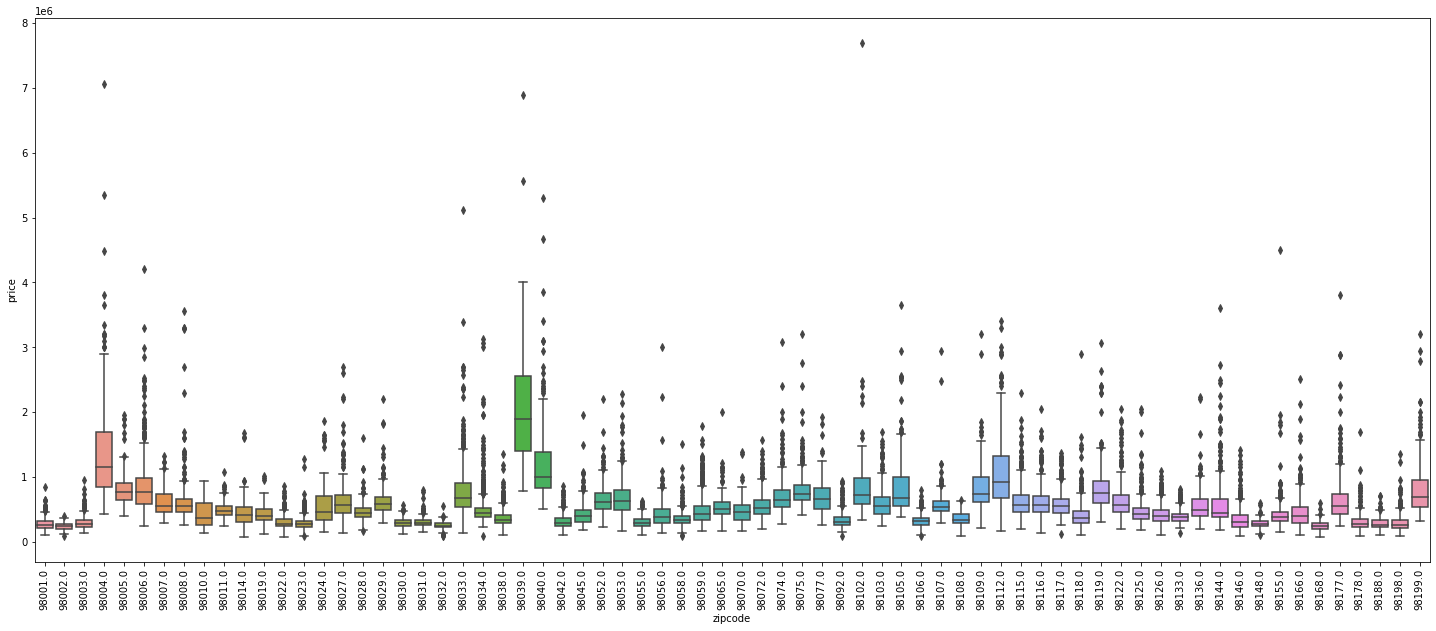

In [ ]:
import seaborn as sns
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x=data.frame.zipcode, y=data.frame.price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Therefore, as you can see below, if you apply the OneHotEncoding to the `zipcode`, you will end up with 70 features (i.e., given that the `zipcode` feature has 70 different values).

This is a unique feature, but what would happen if you have many of these features with many different levels for each one? You will easily end up with hundreds or even thousands of features.

In [ ]:
pd.get_dummies(X.zipcode)

,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98103.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As we presented in class, this situation can pose a problem for some Machine Learning methods. A potential solution is the use of the [TargetEncoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html).

Very briefly, by applying the TargetEncoder, the features are replaced with the target's expected value for each categorical value.

In [ ]:
! pip install -qq category_encoders
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
X['zipcode_transformed'] = target_encoder.fit_transform(data.frame.zipcode.astype("category"), target)

X[['zipcode', 'zipcode_transformed']]

,zipcode,zipcode_transformed
0,98178.0,310612.755725
1,98125.0,469455.770732
2,98028.0,462480.035336
3,98136.0,551688.673004
4,98074.0,685605.775510
...,...,...
21608,98103.0,584919.210963
21609,98146.0,359483.239583
21610,98144.0,594547.650146
21611,98027.0,616990.592233


As usual, you can integrate this encoder into any pipeline too.

In [ ]:
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())

# Outliers

The next aspect to consider for Data Cleaning is the presence of outliers. We have already discussed this in class. Outliers are extreme values that can affect the final model performance. Nevertheless, the are situations in which we would like to keep them (e.g., they are informative, they help in predicting the target variables, we want to focus on them, such as when we are doing anomaly detection).

In this exercise, we are not going to focus on analyzing the importance of outliers. To that end, you need to apply your knowledge about the business domain in which you are working and analyze if the outliers carry any meaning or they are just mistakes or extrema values that you do not want to focus on. 

We will assume that you know about the outliers and you want to remove them. For this identification and removal, you have several options. You can rely on your intuition and set a threshold for the feature value. You can visualize the distribution of the feature values. You can apply some statistical method (e.g., the Z-score or the interquartile range to remove them).

However, I recommend you to use some of the outlier removal techniques already implemented in sklearn (refer to https://scikit-learn.org/stable/modules/outlier_detection.html for more details). These methods are focused on training a model to detect that some value is an outlier. Once identified, you can decide to keep them, impute them to a more sensible value or even remove them.







For the experimentation, let's make use of another version of the housing dataset.

In [3]:

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

Let's train a Logistic Regression model with the data as it is to serve as baseline

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

pipe = make_pipeline(LinearRegression())
print(cross_val_score(pipe, X, y, cv=5)


array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression


for od in [IsolationForest(), EllipticEnvelope(), LocalOutlierFactor(), OneClassSVM()]:

  yhat = od.fit_predict(X)

  # select all rows that are not outliers
  mask = yhat != -1
  X_without_outliers, y_withouth_outliers = X[mask, :], y[mask]

  pipe = make_pipeline(LinearRegression())
  print(cross_val_score(pipe, X_without_outliers, y_withouth_outliers, cv=5))

[ 0.6006483   0.71114569  0.6595133   0.08974425 -0.70274115]
[ 0.62675426  0.7040996   0.54880932  0.31983642 -6.41373921]
[ 0.60145967  0.56046046  0.58242692 -0.01021429 -3.17066612]
[ 0.55393221 -0.05319951  0.43011503  0.8045749  -0.27712592]


# Binning

In [ ]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

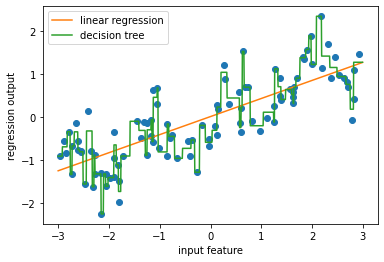

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = make_wave(n_samples=100)
plt.plot(X[:, 0], y, 'o')

line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)
reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(line, reg.predict(line), label="decision tree")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best");

In [ ]:
np.set_printoptions(precision=2)
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

which_bin = np.digitize(X, bins=bins)

# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


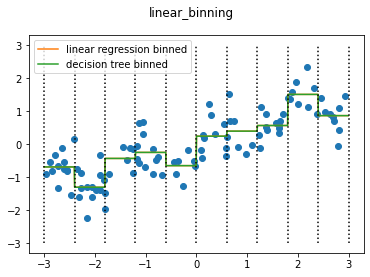

In [ ]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k')
  plt.legend(loc="best")
  plt.suptitle("linear_binning")

# Null Values

## Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).



### Univariate: SimpleImputer

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


strategystr, default=’mean’
The imputation strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [ ]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### Multivariate: IterativeImputer

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


### KNN Imputer

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. For more information on the methodology, see ref. [OL2001].



In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Mark imputed values


In [ ]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only  

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

The features parameter is used to choose the features for which the mask is constructed. By default, it is 'missing-only' which returns the imputer mask of the features containing missing values at fit time:



In [ ]:
indicator.features_


array([0, 1, 2, 3])

The features parameter can be set to 'all' to return all features whether or not they contain missing values:



In [ ]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all

array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [ ]:
indicator.features_

array([0, 1, 2, 3])

## Everything together: Pipelines



In [ ]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
X, y = load_iris(return_X_y=True)

# Randomly assing null values to 20% of the dataset
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X[mask] = np.nan

Now we create a FeatureUnion. All features will be imputed using SimpleImputer, in order to enable classifiers to work with this data. Additionally, it adds the indicator variables from MissingIndicator.



In [ ]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])

Of course, we cannot use the transformer to make any predictions. We should wrap this in a Pipeline with a classifier (e.g., a Logistic Regression) to be able to make predictions.



In [ ]:
clf = make_pipeline(transformer, LogisticRegression(max_iter=1000))
cross_val_score(clf, X, y, cv=5)

array([0.8       , 1.        , 0.86666667, 0.76666667, 0.9       ])